In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽기
f=open("C:/Users/wjddu/git/BigData/train/train_ori.csv", "r")
dataframe = pd.read_csv(f, header=0)


In [2]:
quantile_25 = np.quantile(dataframe['pow_gen'], 0.25)
quantile_75 = np.quantile(dataframe['pow_gen'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)
dataframe.drop(dataframe[dataframe.pow_gen >= 1029.33625]. index, inplace = True)

-617.60175 1029.33625


In [3]:
quantile_25 = np.quantile(dataframe['temperature'], 0.25)
quantile_75 = np.quantile(dataframe['temperature'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)
dataframe.drop(dataframe[dataframe.temperature >= 45.75]. index, inplace = True)

-19.450000000000003 45.75


In [4]:
quantile_25 = np.quantile(dataframe['humidity'], 0.25)
quantile_75 = np.quantile(dataframe['humidity'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)
dataframe.drop(dataframe[dataframe.humidity >= 148.5]. index, inplace = True)

-7.5 148.5


In [5]:
quantile_25 = np.quantile(dataframe['dew_point'], 0.25)
quantile_75 = np.quantile(dataframe['dew_point'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)
dataframe.drop(dataframe[dataframe.dew_point >= 46.050000000000004]. index, inplace = True)

-31.150000000000002 46.050000000000004


In [6]:
quantile_25 = np.quantile(dataframe['sol_rad'], 0.25)
quantile_75 = np.quantile(dataframe['sol_rad'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)
dataframe.drop(dataframe[dataframe.dew_point >= 444.44499999999994]. index, inplace = True)

-266.667 444.44499999999994


In [7]:
quantile_25 = np.quantile(dataframe['cloud'], 0.25)
quantile_75 = np.quantile(dataframe['cloud'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)
dataframe.drop(dataframe[dataframe.dew_point >= 17.5]. index, inplace = True)

-10.5 17.5


In [8]:
seq= dataframe[['temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']].to_numpy()

In [9]:
#윈도우 단위로 자르는 함수
def seq2dataset(seq,window, horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x= seq[i:i+window]
        y= seq[i+window+horizon-1]
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

# 한 달 정보를 측정하여 다음 날의 정보를 예측
w=30
h=1

X,Y= seq2dataset(seq,w,h)
print(X.shape, Y.shape)

(25523, 30, 5) (25523, 5)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#훈련 집합과 테스트 집합으로 분할
split = int(len(X)*0.7)
x_train= X[0:split]; y_train = Y[0:split]
x_test= X[split:]; y_test = Y[split:]

In [12]:
#LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(5))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist=model.fit(x_train,y_train, epochs=60, batch_size=32, validation_data=(x_test,y_test), verbose=1)

Epoch 1/60
559/559 [==============================] - 62s 69ms/step - loss: 350605.2812 - mse: 350605.2812 - val_loss: 40748.0977 - val_mse: 40748.0977
Epoch 2/60
559/559 [==============================] - 34s 61ms/step - loss: 17176.3945 - mse: 17176.3945 - val_loss: 9156.3877 - val_mse: 9156.3877
Epoch 3/60
559/559 [==============================] - 38s 67ms/step - loss: 13892.4209 - mse: 13892.4209 - val_loss: 7818.5884 - val_mse: 7818.5884
Epoch 4/60
559/559 [==============================] - 32s 57ms/step - loss: 7336.7935 - mse: 7336.7935 - val_loss: 7193.1274 - val_mse: 7193.1274
Epoch 5/60
559/559 [==============================] - 36s 64ms/step - loss: 992985.0625 - mse: 992985.0625 - val_loss: 7863.9990 - val_mse: 7863.9990
Epoch 6/60
559/559 [==============================] - 33s 59ms/step - loss: 7272.6367 - mse: 7272.6367 - val_loss: 5367.2065 - val_mse: 5367.2065
Epoch 7/60
559/559 [==============================] - 29s 53ms/step - loss: 5890.6157 - mse: 5890.6157 - val_l

559/559 [==============================] - 19s 34ms/step - loss: 809.6592 - mse: 809.6592 - val_loss: 758.8112 - val_mse: 758.8112
Epoch 58/60
559/559 [==============================] - 20s 36ms/step - loss: 823.9620 - mse: 823.9620 - val_loss: 726.0248 - val_mse: 726.0248
Epoch 59/60
559/559 [==============================] - 19s 34ms/step - loss: 783.2108 - mse: 783.2108 - val_loss: 737.6607 - val_mse: 737.6607
Epoch 60/60
559/559 [==============================] - 17s 31ms/step - loss: 755.8532 - mse: 755.8532 - val_loss: 787.1804 - val_mse: 787.1804


In [51]:
#LSTM 모델 평가
ev=model.evaluate(x_test,y_test, verbose=0)
ev
# print("손실 함수", ev[0], "MSE:",ev[1])
# print(ev[1] ** 0.5)

[787.180419921875, 787.180419921875]

In [22]:
# R2 구하기
pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, pred)
print("R2 : ", r2_y_predict)

R2 :  0.5724107689901189


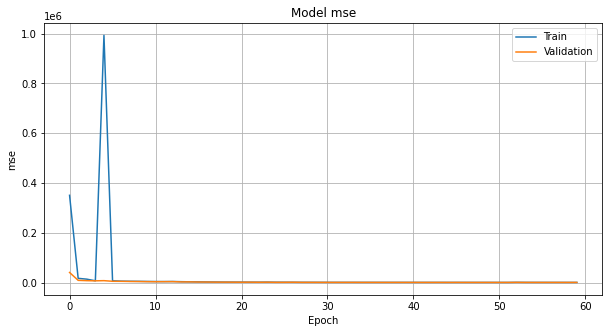

In [50]:
#학습 곡선
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
# plt.ylim([120, 800])
plt.legend(['Train', 'Validation'],loc='best')
plt.grid()
plt.show()

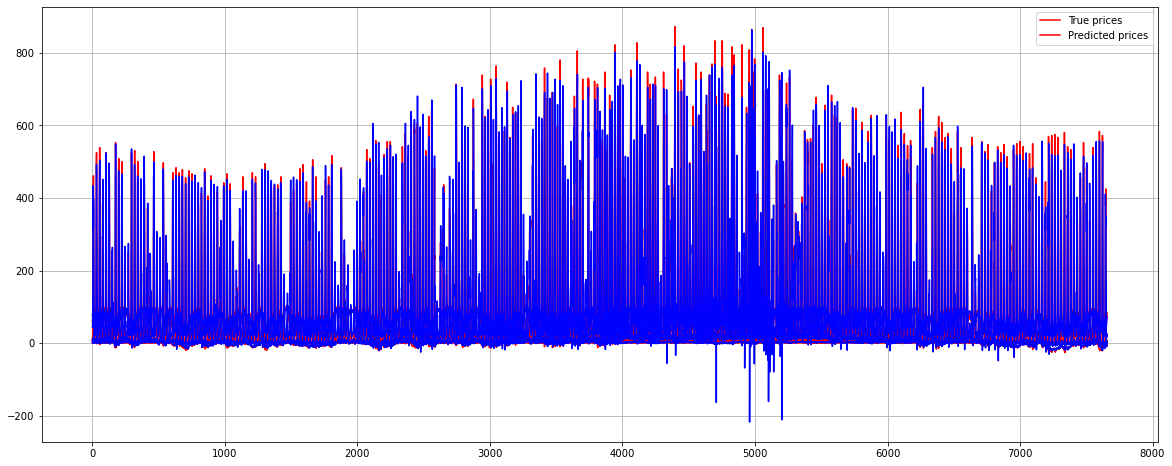

In [24]:
#예측 결과 시각화
plt.rcParams["figure.figsize"] = (20,8)
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

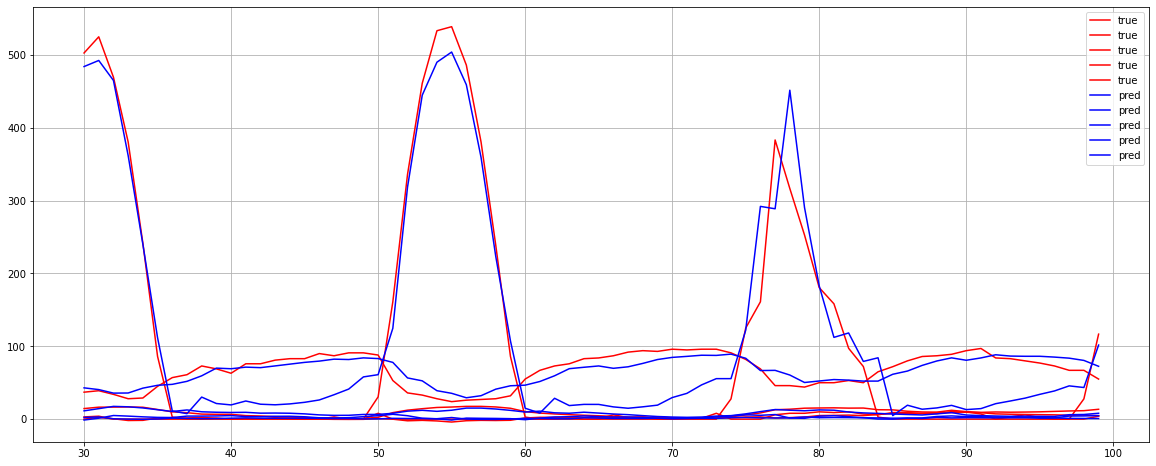

In [48]:
#일부 구간을 확대하여 시각화
x_range = range(30,100)
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(x_range, y_test[x_range], color='red', label="true")
plt.plot(x_range, pred[x_range], color='blue', label="pred")
plt.legend()
plt.grid()
plt.show()